In [3]:
import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
# import numpy as np
# import matplotlib.pyplot as plt

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('C:\\files\\Documents\\polyu\\courses\\urban_big_data\\final_project\\train.csv')

data['Dates'] = pd.to_datetime(data['Dates'])
data['Year'] = data['Dates'].dt.year
data['Month'] = data['Dates'].dt.month
data['Day'] = data['Dates'].dt.day


In [6]:
label_encoders = {}
for column in ['DayOfWeek', 'PdDistrict', 'Address']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

In [4]:
X = data[['DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y', 'Year', 'Month', 'Day']]
y = data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1104)

In [5]:
n_estimators_values = [300]

accuracy_scores = []
roc_auc_scores = []

for n in n_estimators_values:
    clf = RandomForestClassifier(n_estimators=n, random_state=1104)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

    accuracy_scores.append(accuracy)
    roc_auc_scores.append(roc_auc)


print(accuracy_scores)
print(roc_auc_scores)


[0.297055976311144]
[np.float64(0.6424516659442677)]


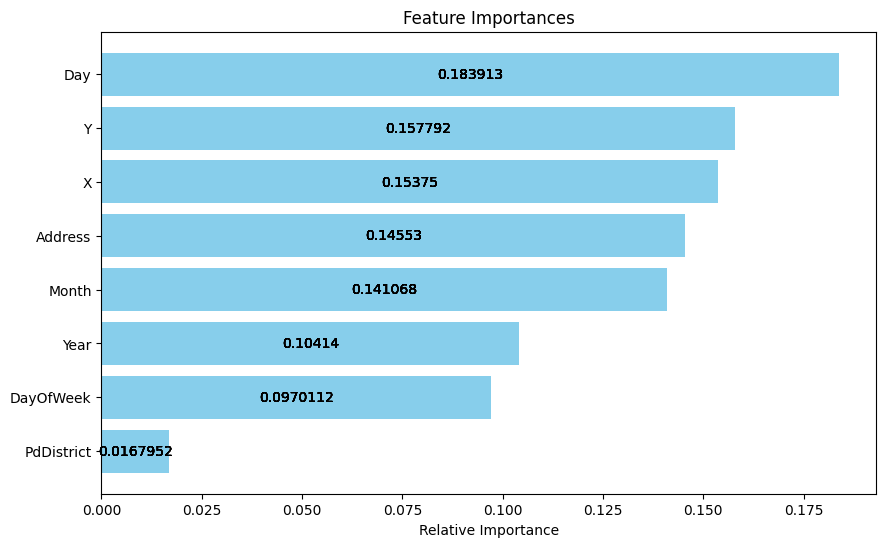

In [9]:
importances = clf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
indices = np.argsort(importances)
plt.title('Feature Importances')
barh = plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
for b in barh:
    plt.bar_label(barh, label_type='center')

plt.show()

In [8]:
# Define the ranges of n_estimators
n_estimators_values = [100]

# Data preprocessing for categorical features
categorical_features = ['DayOfWeek', 'PdDistrict', 'Address']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(data[['DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y', 'Year', 'Month', 'Day']])
y = data['Category']

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=1104)

log_loss_scores = []
weighted_accuracy_scores = []

# Calculate class weights for weighted accuracy
class_weights = y_train.value_counts().max() / y_train.value_counts()
weights = y_test.map(class_weights)

for n in n_estimators_values:
    clf = RandomForestClassifier(n_estimators=n, random_state=1104)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)

    # Calculate log loss
    loss = log_loss(y_test, y_proba)
    log_loss_scores.append(loss)
    
    # Calculate weighted accuracy
    weighted_accuracy = accuracy_score(y_test, y_pred, sample_weight=weights)
    weighted_accuracy_scores.append(weighted_accuracy)

print("Log Loss Scores:", log_loss_scores)
print("Weighted Accuracy Scores:", weighted_accuracy_scores)

Log Loss Scores: [6.512576937576384]
Weighted Accuracy Scores: [0.12231636935836172]


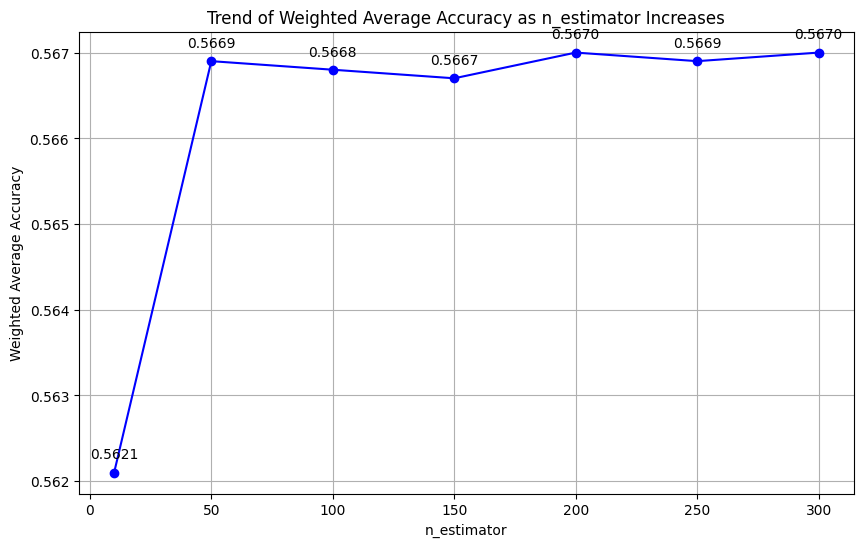

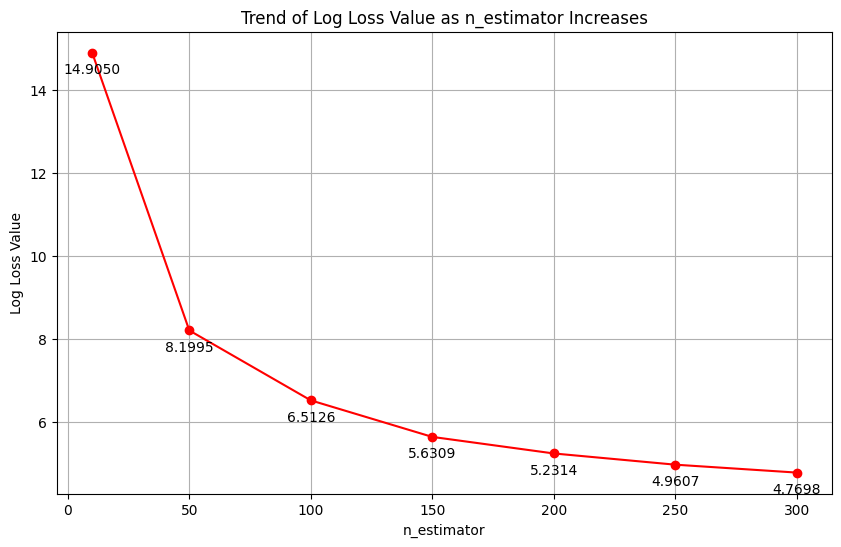

In [14]:
import matplotlib.pyplot as plt

# Data
n_estimators = [10, 50, 100, 150, 200, 250, 300]
accuracy = [0.5621, 0.5669, 0.5668, 0.5667, 0.5670, 0.5669, 0.5670]
log_loss = [14.9050, 8.1995, 6.5126, 5.6309, 5.2314, 4.9607, 4.7698]

# Plot for Weighted Average Accuracy
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, accuracy, label='Weighted Average Accuracy', marker='o', linestyle='-', color='blue')
plt.xlabel('n_estimator')
plt.ylabel('Weighted Average Accuracy')
plt.title('Trend of Weighted Average Accuracy as n_estimator Increases')
plt.grid(True)

# Adding data labels for accuracy
for i, txt in enumerate(accuracy):
    plt.annotate(f"{txt:.4f}", (n_estimators[i], accuracy[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

# Plot for Log Loss Value
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, log_loss, label='Log Loss Value', marker='o', linestyle='-', color='red')
plt.xlabel('n_estimator')
plt.ylabel('Log Loss Value')
plt.title('Trend of Log Loss Value as n_estimator Increases')
plt.grid(True)

# Adding data labels for log loss
for i, txt in enumerate(log_loss):
    plt.annotate(f"{txt:.4f}", (n_estimators[i], log_loss[i]), textcoords="offset points", xytext=(0,-15), ha='center')

plt.show()

Category
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQ

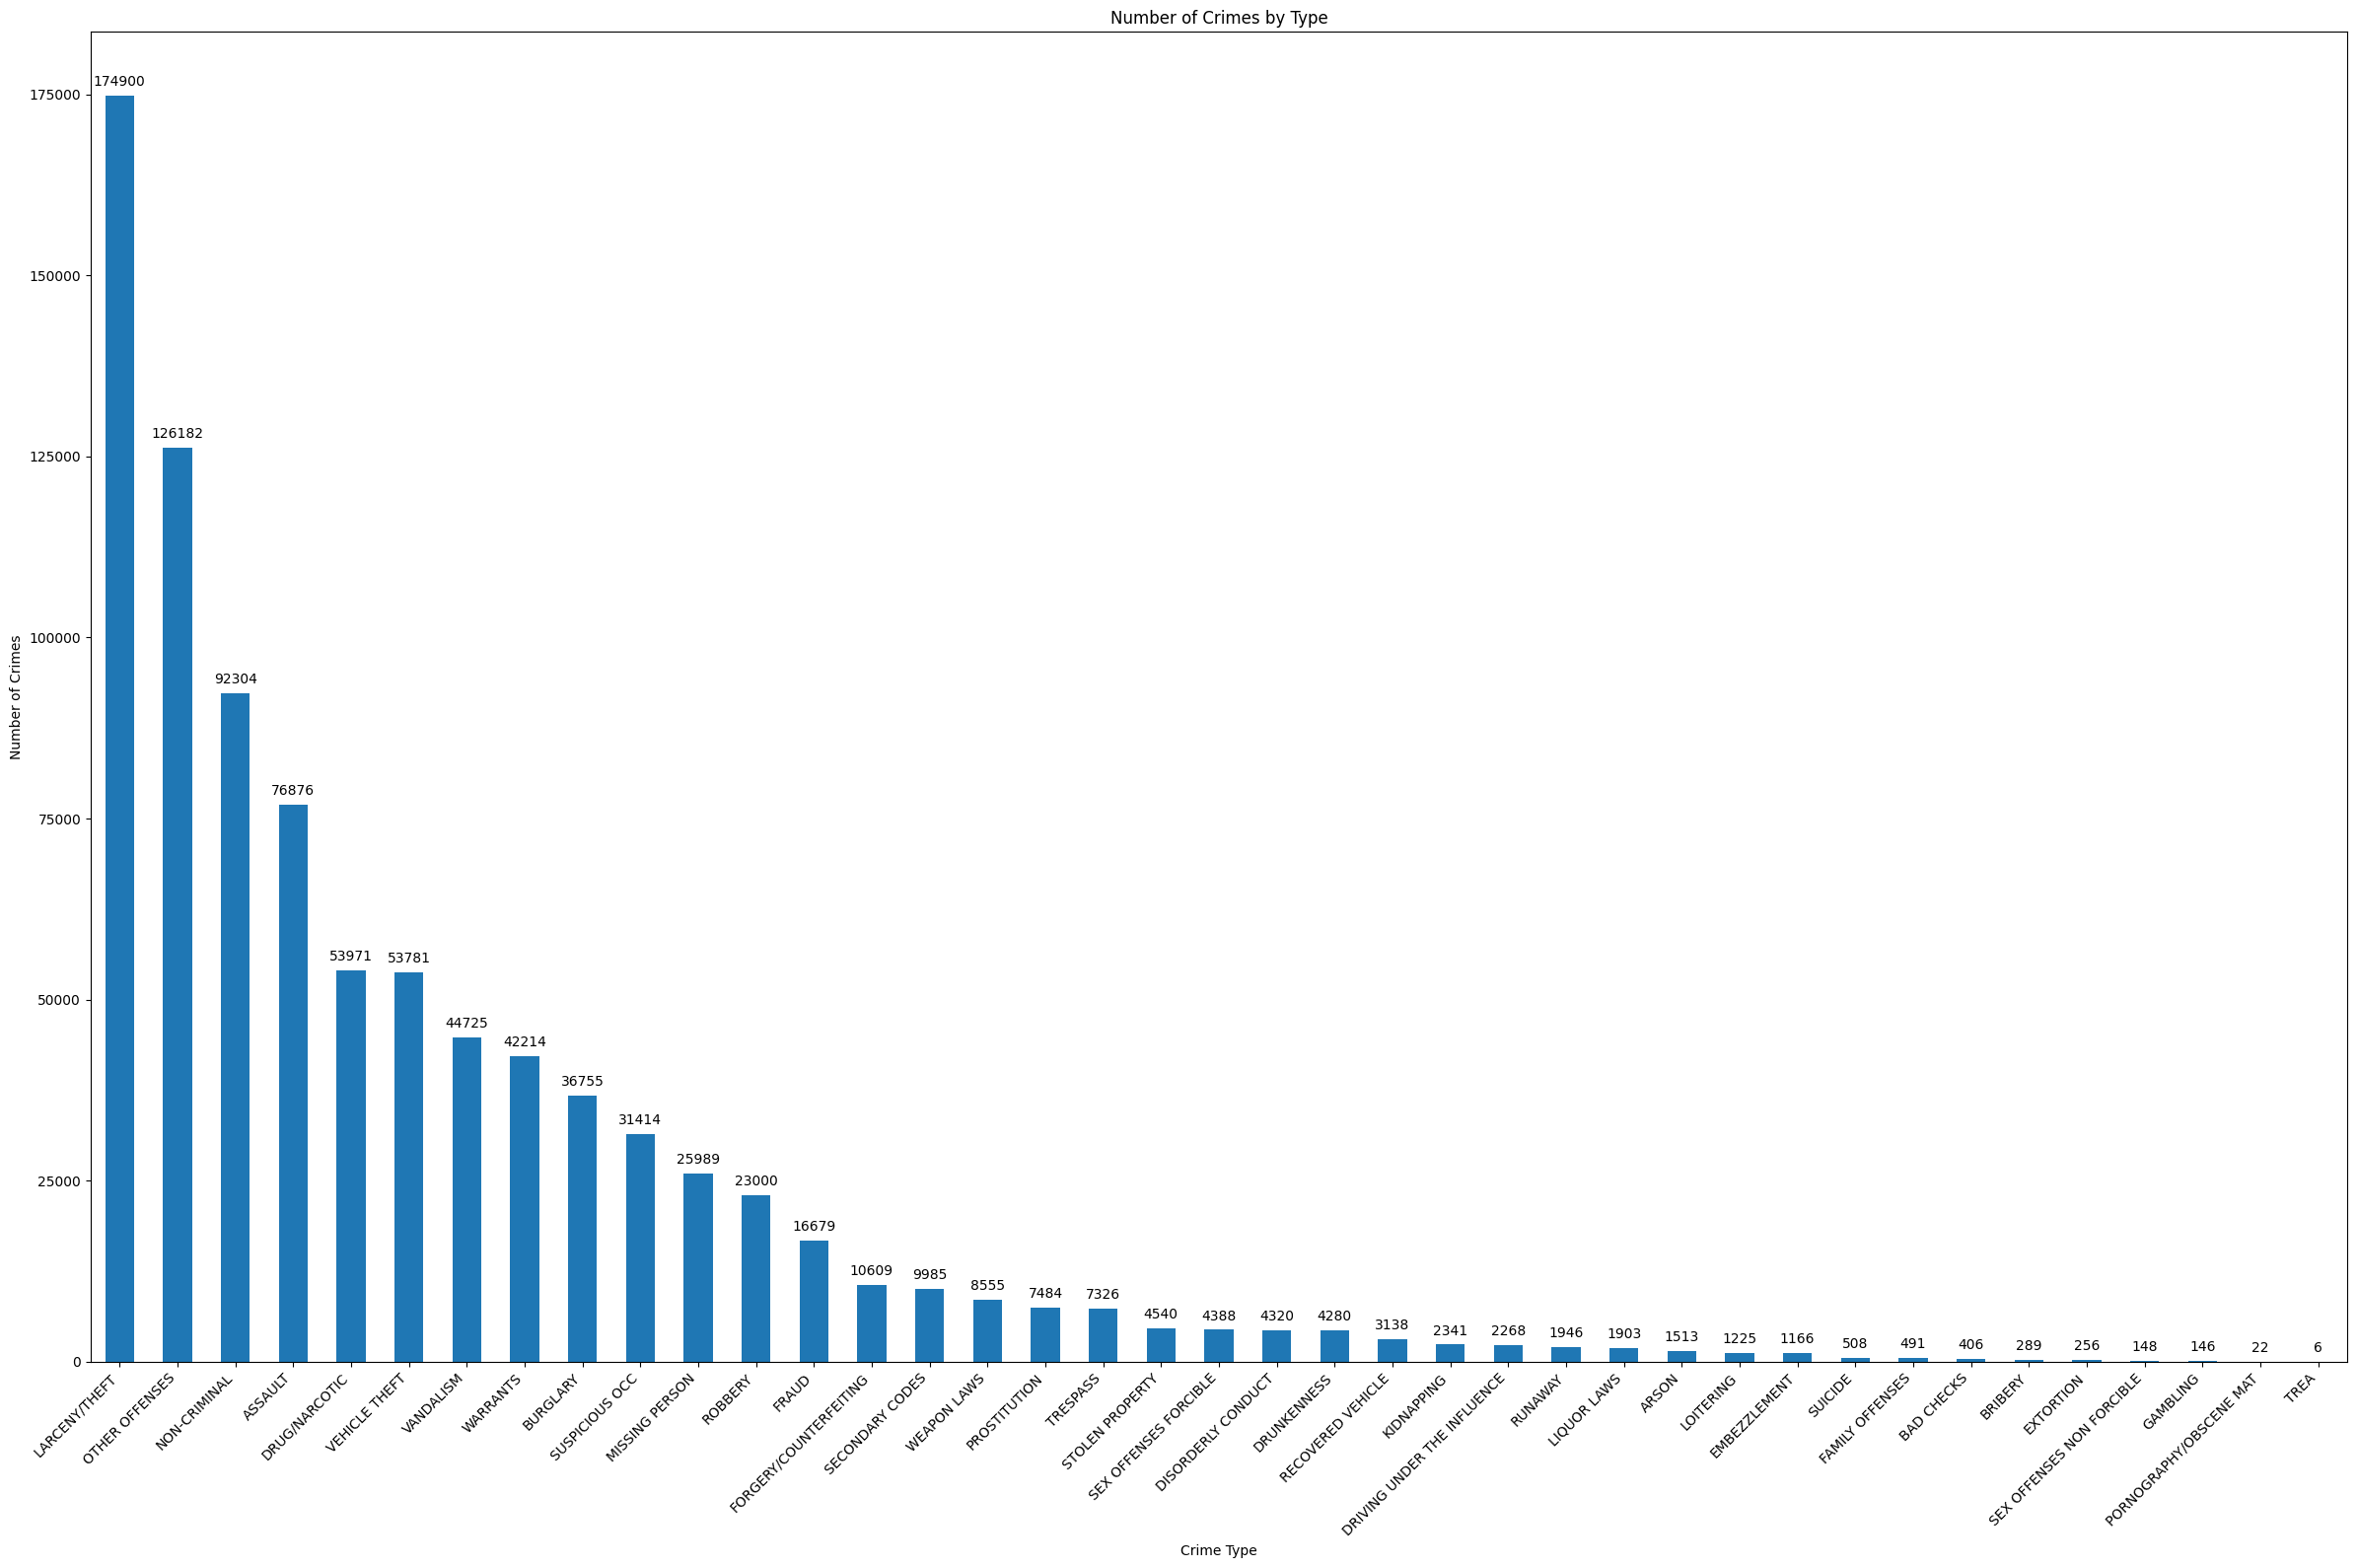

In [9]:
# Count the number of occurrences of each category
category_counts = data['Category'].value_counts()
print(category_counts)
print(type(category_counts))

# Step 1: Extract total number of instances
total_instances = category_counts.sum()

# Step 2 and 3: Calculate probabilities and their squares
probabilities = category_counts / total_instances
squared_probabilities = probabilities ** 2

# Step 4: Calculate weighted average accuracy
weighted_average_accuracy = (squared_probabilities * category_counts).sum() / total_instances

print("Weighted Average Accuracy of Random Classifier:", weighted_average_accuracy)


plt.figure(figsize=(24, 16))
ax = category_counts.plot(kind='bar')
plt.title('Number of Crimes by Type')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')


for i in ax.patches:
    y_value = i.get_height()
    x_value = i.get_x() + i.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        space *= -1  # Invert space to place label below
        va = 'top'   # Vertically align label at top

    label = "{:.0f}".format(y_value)  # Format Y value to 0 decimal place

    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.

plt.tight_layout()
plt.show()

In [10]:
# Step 1: Calculate the category counts
category_counts = data['Category'].value_counts()

# Step 2: Create a dictionary to map each category to its new feature based on frequency
category_feature = {category: ("frequent crime type" if count > 50000 else "infrequent crime type")
                    for category, count in category_counts.items()}

# Step 3: Map the categories in the DataFrame to their corresponding new feature
data['Crime Frequency Type'] = data['Category'].map(category_feature)

# Display the updated DataFrame to check the new feature
print(data.head(200))

# Filter rows where the 'Crime Frequency Type' is 'infrequent crime type'
infrequent_crimes = data[data['Crime Frequency Type'] == 'infrequent crime type']

# Display the result
print(infrequent_crimes)

                  Dates        Category                       Descript  \
0   2015-05-13 23:53:00        WARRANTS                 WARRANT ARREST   
1   2015-05-13 23:53:00  OTHER OFFENSES       TRAFFIC VIOLATION ARREST   
2   2015-05-13 23:33:00  OTHER OFFENSES       TRAFFIC VIOLATION ARREST   
3   2015-05-13 23:30:00   LARCENY/THEFT   GRAND THEFT FROM LOCKED AUTO   
4   2015-05-13 23:30:00   LARCENY/THEFT   GRAND THEFT FROM LOCKED AUTO   
..                  ...             ...                            ...   
195 2015-05-13 14:09:00  OTHER OFFENSES    VIOLATION OF MUNICIPAL CODE   
196 2015-05-13 14:09:00  OTHER OFFENSES               PAROLE VIOLATION   
197 2015-05-13 14:05:00       VANDALISM  MALICIOUS MISCHIEF, VANDALISM   
198 2015-05-13 14:03:00  OTHER OFFENSES               PAROLE VIOLATION   
199 2015-05-13 14:03:00        WARRANTS      ENROUTE TO PAROLE OFFICER   

     DayOfWeek  PdDistrict      Resolution  Address           X          Y  \
0            6           4  ARRES

In [12]:
# Define the ranges of n_estimators
n_estimators_values = [50]

# Data preprocessing for categorical features
categorical_features = ['DayOfWeek', 'PdDistrict', 'Address']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(data[['DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y', 'Year', 'Month', 'Day']])
y = data['Crime Frequency Type']

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=1104)

log_loss_scores = []
weighted_accuracy_scores = []

# Calculate class weights for weighted accuracy
class_weights = y_train.value_counts().max() / y_train.value_counts()
weights = y_test.map(class_weights)

for n in n_estimators_values:
    clf = RandomForestClassifier(n_estimators=n, random_state=1104)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)

    # Calculate log loss
    loss = log_loss(y_test, y_proba)
    log_loss_scores.append(loss)
    
    # Calculate weighted accuracy
    weighted_accuracy = accuracy_score(y_test, y_pred, sample_weight=weights)
    weighted_accuracy_scores.append(weighted_accuracy)

print("Log Loss Scores:", log_loss_scores)
print("Weighted Accuracy Scores:", weighted_accuracy_scores)

Log Loss Scores: [0.8697241502601263]
Weighted Accuracy Scores: [0.5668813204122833]
